# Step 1: Importing the Libraries

In [77]:
import pandas as pd
import matplotlib.pyplot as plt
from glob import glob
import os
import seaborn as sns
import numpy as np
import tensorflow as tf
from tensorflow import keras
from PIL import Image 
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, AveragePooling2D,MaxPool2D
from tensorflow.keras.optimizers import Adam
from keras.callbacks import ReduceLROnPlateau
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix, accuracy_score
import itertools

In [2]:
skin_CD = pd.read_csv("HAM10000_metadata.csv")

In [3]:
skin_CD

lesion_id      image_id     dx dx_type   age     sex localization
0      HAM_0000118  ISIC_0027419    bkl   histo  80.0    male        scalp
1      HAM_0000118  ISIC_0025030    bkl   histo  80.0    male        scalp
2      HAM_0002730  ISIC_0026769    bkl   histo  80.0    male        scalp
3      HAM_0002730  ISIC_0025661    bkl   histo  80.0    male        scalp
4      HAM_0001466  ISIC_0031633    bkl   histo  75.0    male          ear
...            ...           ...    ...     ...   ...     ...          ...
10010  HAM_0002867  ISIC_0033084  akiec   histo  40.0    male      abdomen
10011  HAM_0002867  ISIC_0033550  akiec   histo  40.0    male      abdomen
10012  HAM_0002867  ISIC_0033536  akiec   histo  40.0    male      abdomen
10013  HAM_0000239  ISIC_0032854  akiec   histo  80.0    male         face
10014  HAM_0003521  ISIC_0032258    mel   histo  70.0  female         back

[10015 rows x 7 columns]

# Step 2: Making a Dictionary of images and labels

In [4]:
project_path_dict = {os.path.splitext(os.path.basename(x))[0]: x
                     for x in glob(os.path.join('C:/Users/abhis/Skin Cancer/HAM10000/','*','*.jpg'))}

In [5]:
lesion_type_dict = {
    'nv': 'Melanocytic nevi',
    'mel': 'Melanoma',
    'bkl': 'Benign keratosis-like lesions ',
    'bcc': 'Basal cell carcinoma',
    'akiec': 'Actinic keratoses',
    'vasc': 'Vascular lesions',
    'df': 'Dermatofibroma'
}

# Step 3:Reading and Processing Data

In [6]:
skin_CD = pd.read_csv(os.path.join('C:/Users/abhis/Skin Cancer/HAM10000/','C:/Users/abhis/Skin Cancer/HAM10000/HAM10000_metadata.csv'))

In [7]:
skin_CD['route'] = skin_CD['image_id'].map(project_path_dict.get)
skin_CD['skin_type'] = skin_CD['dx'].map(lesion_type_dict.get) 
skin_CD['skin_type_idx'] = pd.Categorical(skin_CD['skin_type']).codes

In [8]:
skin_CD.head(n = 10)

lesion_id      image_id   dx dx_type   age     sex localization  \
0  HAM_0000118  ISIC_0027419  bkl   histo  80.0    male        scalp   
1  HAM_0000118  ISIC_0025030  bkl   histo  80.0    male        scalp   
2  HAM_0002730  ISIC_0026769  bkl   histo  80.0    male        scalp   
3  HAM_0002730  ISIC_0025661  bkl   histo  80.0    male        scalp   
4  HAM_0001466  ISIC_0031633  bkl   histo  75.0    male          ear   
5  HAM_0001466  ISIC_0027850  bkl   histo  75.0    male          ear   
6  HAM_0002761  ISIC_0029176  bkl   histo  60.0    male         face   
7  HAM_0002761  ISIC_0029068  bkl   histo  60.0    male         face   
8  HAM_0005132  ISIC_0025837  bkl   histo  70.0  female         back   
9  HAM_0005132  ISIC_0025209  bkl   histo  70.0  female         back   

                                               route  \
0  C:/Users/abhis/Skin Cancer/HAM10000\HAM10000_i...   
1  C:/Users/abhis/Skin Cancer/HAM10000\HAM10000_i...   
2  C:/Users/abhis/Skin Cancer/HAM10000\HAM10000_i...   
3  C:/Users/abhis/Skin Cancer/HAM10000\HAM10000_i...   
4  C:/Users/abhis/Skin Cancer/HAM10000\HAM10000_i...   
5  C:/Users/abhis/Skin Cancer/HAM10000\HAM10000_i...   
6  C:/Users/abhis/Skin Cancer/HAM10000\HAM10000_i...   
7  C:/Users/abhis/Skin Cancer/HAM10000\HAM10000_i...   
8  C:/Users/abhis/Skin Cancer/HAM10000\HAM10000_i...   
9  C:/Users/abhis/Skin Cancer/HAM10000\HAM10000_i...   

                        skin_type  skin_type_idx  
0  Benign keratosis-like lesions               2  
1  Benign keratosis-like lesions               2  
2  Benign keratosis-like lesions               2  
3  Benign keratosis-like lesions               2  
4  Benign keratosis-like lesions               2  
5  Benign keratosis-like lesions               2  
6  Benign keratosis-like lesions               2  
7  Benign keratosis-like lesions               2  
8  Benign keratosis-like lesions               2  
9  Benign keratosis-like lesions               2

In [9]:
skin_CD.tail(n = 10)

lesion_id      image_id     dx dx_type   age     sex  \
10005  HAM_0005579  ISIC_0028393  akiec   histo  80.0    male   
10006  HAM_0004034  ISIC_0024948  akiec   histo  55.0  female   
10007  HAM_0001565  ISIC_0028619  akiec   histo  60.0  female   
10008  HAM_0001576  ISIC_0033705  akiec   histo  60.0    male   
10009  HAM_0005705  ISIC_0031430  akiec   histo  75.0  female   
10010  HAM_0002867  ISIC_0033084  akiec   histo  40.0    male   
10011  HAM_0002867  ISIC_0033550  akiec   histo  40.0    male   
10012  HAM_0002867  ISIC_0033536  akiec   histo  40.0    male   
10013  HAM_0000239  ISIC_0032854  akiec   histo  80.0    male   
10014  HAM_0003521  ISIC_0032258    mel   histo  70.0  female   

          localization                                              route  \
10005             face  C:/Users/abhis/Skin Cancer/HAM10000\HAM10000_i...   
10006             face  C:/Users/abhis/Skin Cancer/HAM10000\HAM10000_i...   
10007             face  C:/Users/abhis/Skin Cancer/HAM10000\HAM10000_i...   
10008             face  C:/Users/abhis/Skin Cancer/HAM10000\HAM10000_i...   
10009  lower extremity  C:/Users/abhis/Skin Cancer/HAM10000\HAM10000_i...   
10010          abdomen  C:/Users/abhis/Skin Cancer/HAM10000\HAM10000_i...   
10011          abdomen  C:/Users/abhis/Skin Cancer/HAM10000\HAM10000_i...   
10012          abdomen  C:/Users/abhis/Skin Cancer/HAM10000\HAM10000_i...   
10013             face  C:/Users/abhis/Skin Cancer/HAM10000\HAM10000_i...   
10014             back  C:/Users/abhis/Skin Cancer/HAM10000\HAM10000_i...   

               skin_type  skin_type_idx  
10005  Actinic keratoses              0  
10006  Actinic keratoses              0  
10007  Actinic keratoses              0  
10008  Actinic keratoses              0  
10009  Actinic keratoses              0  
10010  Actinic keratoses              0  
10011  Actinic keratoses              0  
10012  Actinic keratoses              0  
10013  Actinic keratoses              0  
10014           Melanoma              5

# Step 4: Data Cleaning

In [10]:
skin_CD.shape

(10015, 10)

In [11]:
print(skin_CD.dtypes)

lesion_id         object
image_id          object
dx                object
dx_type           object
age              float64
sex               object
localization      object
route             object
skin_type         object
skin_type_idx       int8
dtype: object


In [12]:
skin_CD.isnull().sum()

lesion_id         0
image_id          0
dx                0
dx_type           0
age              57
sex               0
localization      0
route             0
skin_type         0
skin_type_idx     0
dtype: int64

In [13]:
skin_CD['age'].fillna((skin_CD['age'].mean()), inplace=True)

In [14]:
skin_CD.isnull().sum()

lesion_id        0
image_id         0
dx               0
dx_type          0
age              0
sex              0
localization     0
route            0
skin_type        0
skin_type_idx    0
dtype: int64

# Step 5: Explotary Data Analysis

In [15]:
fig = make_subplots(rows=2, cols=2,
                    subplot_titles=['Sex', 'Localisation', 'Age', 'Skin Type'],
                    vertical_spacing=0.15,
                    column_widths=[0.4, 0.6])

fig.add_trace(go.Bar(
            x=skin_CD['sex'].value_counts().index, 
            y=skin_CD['sex'].value_counts()),
            row=1, col=1)
fig.add_trace(go.Bar(
            x=skin_CD['localization'].value_counts().index, 
            y=skin_CD['localization'].value_counts()),
            row=1, col=2)
fig.add_trace(go.Histogram(
            x=skin_CD['age']),
            row=2, col=1)
fig.add_trace(go.Bar(
            x=skin_CD['dx'].value_counts().index.map(lesion_type_dict.get), 
            y=skin_CD['dx'].value_counts()),
            row=2, col=2)


for i in range(4):
    fig.update_yaxes(title_text='Count', row=i//2+1, col=i%2+1)
fig.update_layout(title='Distribution of Data', height=800)

fig.show()

Text(0.5, 1.0, 'Diagnosis Test Type: Distribution Plot')

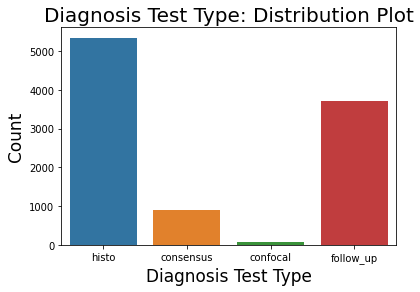

In [16]:
sns.countplot(x = "dx_type", data = skin_CD)
plt.xlabel("Diagnosis Test Type", fontsize=17)
plt.ylabel("Count", fontsize=17)
plt.title("Diagnosis Test Type: Distribution Plot", fontsize=20)

C:\Users\abhis\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='age', ylabel='skin_type_idx'>

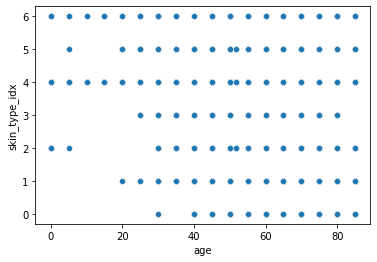

In [17]:
sns.scatterplot('age','skin_type_idx',data=skin_CD)

In [18]:
skin_CD.skin_type_idx.value_counts()

4    6705
5    1113
2    1099
1     514
0     327
6     142
3     115
Name: skin_type_idx, dtype: int64

# Step 6: Oversampling

In [19]:
class_4,class_5,class_2,class_1,class_0,class_6,class_3 = skin_CD.skin_type_idx.value_counts()

skin_class_0 = skin_CD[skin_CD['skin_type_idx'] == 0]
skin_class_1 = skin_CD[skin_CD['skin_type_idx'] == 1]
skin_class_2 = skin_CD[skin_CD['skin_type_idx'] == 2]
skin_class_3 = skin_CD[skin_CD['skin_type_idx'] == 3]
skin_class_4 = skin_CD[skin_CD['skin_type_idx'] == 4]
skin_class_5 = skin_CD[skin_CD['skin_type_idx'] == 5]
skin_class_6 = skin_CD[skin_CD['skin_type_idx'] == 6]

In [20]:
class_0,class_1,class_2,class_3,class_4,class_5,class_6

(327, 514, 1099, 115, 6705, 1113, 142)

In [21]:
skin_class_0.shape

(327, 10)

In [22]:
skin_class_1.shape

(514, 10)

In [23]:
skin_class_2.shape

(1099, 10)

In [24]:
skin_class_3.shape

(115, 10)

In [25]:
skin_class_4.shape

(6705, 10)

In [26]:
skin_class_5.shape

(1113, 10)

In [27]:
skin_class_6.shape

(142, 10)

In [28]:
skin_class_0_over = skin_class_0.sample(class_4,replace = True)

In [29]:
skin_class_0_over.shape

(6705, 10)

In [30]:
skin_class_1_over = skin_class_1.sample(class_4,replace = True)

In [31]:
skin_class_1_over.shape

(6705, 10)

In [32]:
skin_class_2_over = skin_class_2.sample(class_4,replace = True)

In [33]:
skin_class_2_over.shape

(6705, 10)

In [34]:
skin_class_3_over = skin_class_3.sample(class_4,replace = True)

In [35]:
skin_class_3_over.shape

(6705, 10)

In [36]:
skin_class_5_over = skin_class_5.sample(class_4,replace = True)

In [37]:
skin_class_5_over.shape

(6705, 10)

In [38]:
skin_class_6_over = skin_class_6.sample(class_4,replace = True)

In [39]:
skin_class_6_over.shape

(6705, 10)

In [40]:
skin_CD_test_over = pd.concat([skin_class_0_over,skin_class_1_over,skin_class_2_over,skin_class_3_over
                               ,skin_class_4,skin_class_5_over,skin_class_6_over], axis = 0)

In [41]:
skin_CD_test_over.shape

(46935, 10)

In [42]:
print('Random over-sampling:')
print(skin_CD_test_over.skin_type_idx.value_counts())

Random over-sampling:
0    6705
1    6705
2    6705
3    6705
4    6705
5    6705
6    6705
Name: skin_type_idx, dtype: int64


# Step 7:Loading and Resizing of Images

In [43]:
skin_CD_test_over['image'] = skin_CD_test_over['route'].map(lambda x: np.asarray(Image.open(x).resize((100,75))))

In [44]:
skin_CD_test_over.head()

lesion_id      image_id     dx dx_type   age     sex     localization  \
9904  HAM_0004992  ISIC_0026132  akiec   histo  70.0    male            chest   
9879  HAM_0001048  ISIC_0026525  akiec   histo  45.0    male             face   
9810  HAM_0006434  ISIC_0028314  akiec   histo  60.0    male  lower extremity   
9955  HAM_0001416  ISIC_0025427  akiec   histo  85.0    male  upper extremity   
9886  HAM_0004592  ISIC_0030730  akiec   histo  60.0  female             face   

                                                  route          skin_type  \
9904  C:/Users/abhis/Skin Cancer/HAM10000\HAM10000_i...  Actinic keratoses   
9879  C:/Users/abhis/Skin Cancer/HAM10000\HAM10000_i...  Actinic keratoses   
9810  C:/Users/abhis/Skin Cancer/HAM10000\HAM10000_i...  Actinic keratoses   
9955  C:/Users/abhis/Skin Cancer/HAM10000\HAM10000_i...  Actinic keratoses   
9886  C:/Users/abhis/Skin Cancer/HAM10000\HAM10000_i...  Actinic keratoses   

      skin_type_idx                                              image  
9904              0  [[[191, 155, 176], [196, 161, 182], [194, 156,...  
9879              0  [[[169, 118, 105], [173, 118, 104], [174, 117,...  
9810              0  [[[211, 156, 139], [211, 154, 137], [212, 160,...  
9955              0  [[[177, 101, 105], [181, 113, 122], [182, 113,...  
9886              0  [[[189, 158, 177], [190, 159, 180], [190, 160,...

# Step 7: Take out the sample data

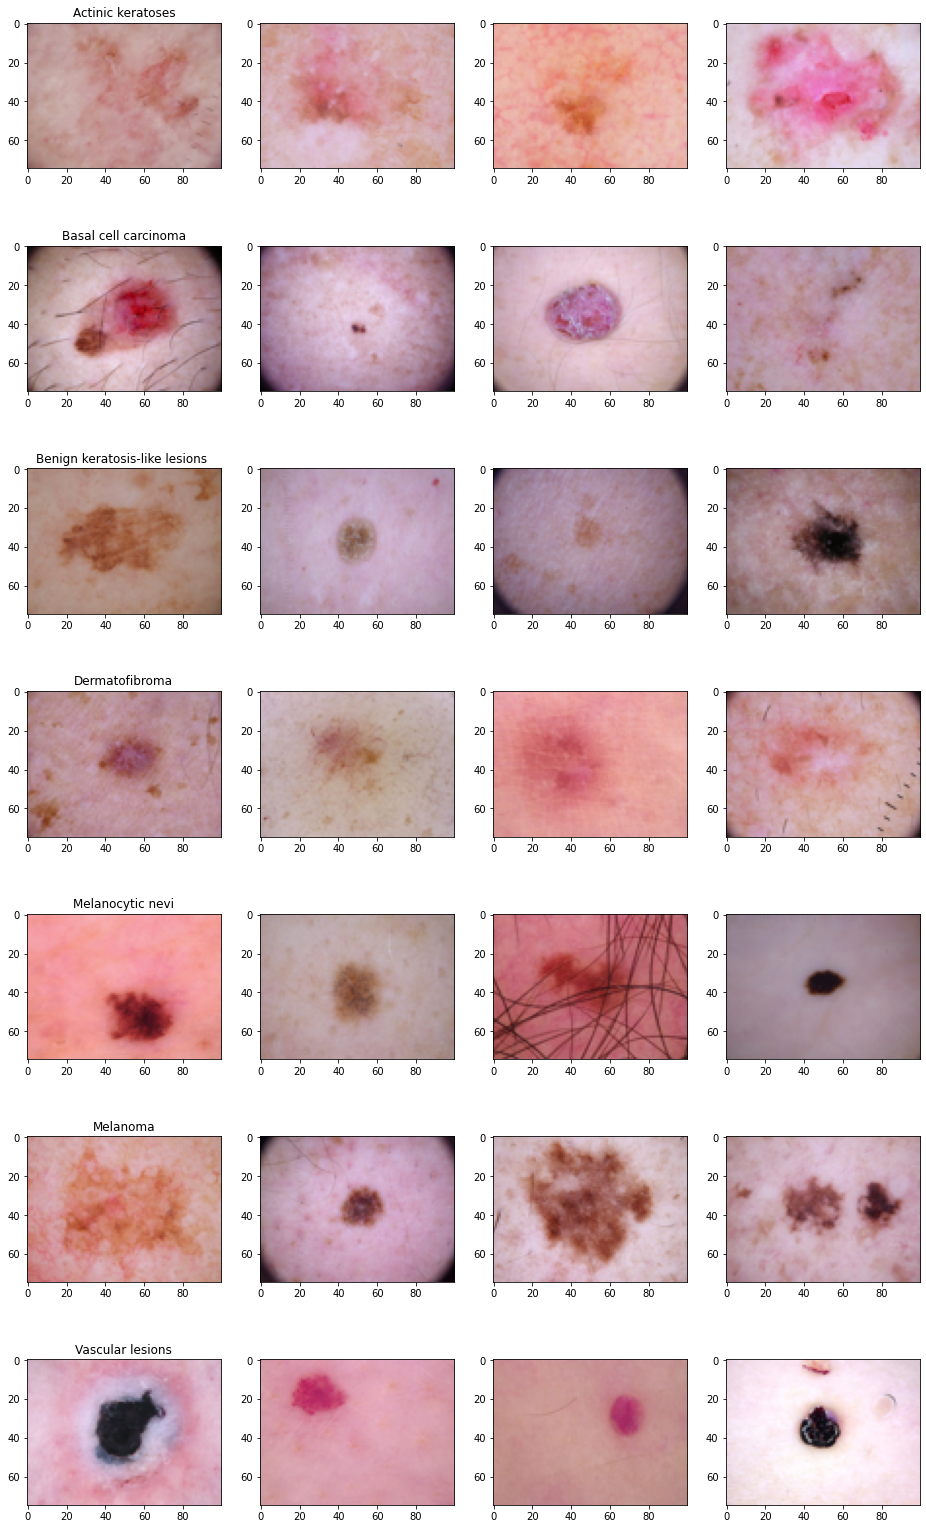

In [45]:
n_samples = 4
fig, m_axs = plt.subplots(7, n_samples, figsize = (4*n_samples, 4*7))
for n_axs, (type_name, type_rows) in zip(m_axs, 
                                         skin_CD_test_over.sort_values(['skin_type']).groupby('skin_type')):
    n_axs[0].set_title(type_name)
    for c_ax, (_, c_row) in zip(n_axs, type_rows.sample(n_samples, random_state=41).iterrows()):
        c_ax.imshow(c_row['image'])
        c_ax.axis('on')
fig.savefig('samples.png', dpi=300)

# Step 8: Selection of Depended and Independed Variables

In [46]:
features=skin_CD_test_over.drop(columns=['skin_type_idx','skin_type','dx'],axis=1)
target=skin_CD_test_over['skin_type_idx']

# Step 9: Train and Test Data Splitting

In [47]:
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.30,random_state=41, stratify = target)

In [48]:
x_train.head()

lesion_id      image_id    dx_type   age     sex     localization  \
9909  HAM_0005648  ISIC_0027580      histo  75.0    male  upper extremity   
2540  HAM_0004970  ISIC_0027774      histo  85.0  female             face   
982   HAM_0003393  ISIC_0032113  consensus  45.0  female             face   
2804  HAM_0007588  ISIC_0031526      histo  55.0  female             back   
1591  HAM_0000322  ISIC_0033942      histo  65.0    male             back   

                                                  route  \
9909  C:/Users/abhis/Skin Cancer/HAM10000\HAM10000_i...   
2540  C:/Users/abhis/Skin Cancer/HAM10000\HAM10000_i...   
982   C:/Users/abhis/Skin Cancer/HAM10000\HAM10000_i...   
2804  C:/Users/abhis/Skin Cancer/HAM10000\HAM10000_i...   
1591  C:/Users/abhis/Skin Cancer/HAM10000\HAM10000_i...   

                                                  image  
9909  [[[195, 180, 187], [192, 177, 183], [189, 172,...  
2540  [[[54, 35, 36], [73, 47, 47], [93, 61, 59], [1...  
982   [[[195, 145, 144], [195, 145, 144], [198, 148,...  
2804  [[[203, 179, 191], [204, 179, 191], [204, 180,...  
1591  [[[168, 117, 136], [173, 125, 149], [174, 127,...

In [49]:
x_test.head()

lesion_id      image_id    dx_type   age     sex     localization  \
1161  HAM_0006188  ISIC_0024330  consensus  40.0    male  lower extremity   
9783  HAM_0002648  ISIC_0027650      histo  40.0    male             neck   
9715  HAM_0003989  ISIC_0030714      histo  70.0  female             face   
2609  HAM_0000263  ISIC_0034058      histo  70.0    male             back   
1113  HAM_0002909  ISIC_0032642      histo  50.0    male  lower extremity   

                                                  route  \
1161  C:/Users/abhis/Skin Cancer/HAM10000\HAM10000_i...   
9783  C:/Users/abhis/Skin Cancer/HAM10000\HAM10000_i...   
9715  C:/Users/abhis/Skin Cancer/HAM10000\HAM10000_i...   
2609  C:/Users/abhis/Skin Cancer/HAM10000\HAM10000_i...   
1113  C:/Users/abhis/Skin Cancer/HAM10000\HAM10000_i...   

                                                  image  
1161  [[[182, 156, 189], [183, 156, 190], [182, 157,...  
9783  [[[177, 129, 145], [177, 131, 147], [176, 132,...  
9715  [[[128, 76, 75], [131, 80, 78], [137, 88, 88],...  
2609  [[[6, 4, 6], [10, 6, 7], [13, 7, 11], [15, 8, ...  
1113  [[[0, 0, 0], [0, 0, 0], [0, 0, 0], [1, 1, 1], ...

In [50]:
y_train.value_counts()

1    4694
5    4694
6    4694
0    4693
2    4693
4    4693
3    4693
Name: skin_type_idx, dtype: int64

In [51]:
y_test.value_counts()

3    2012
0    2012
2    2012
4    2012
1    2011
6    2011
5    2011
Name: skin_type_idx, dtype: int64

# Step 10:Normalization

In [52]:
x_train_1 = x_train['image'].tolist()

x_train_mean = np.mean(x_train_1)
x_train_std = np.std(x_train_1)

x_train_1 = (x_train_1 - x_train_mean)/x_train_std

In [53]:
print('Train min=%.3f, max=%.3f' % (x_train_1.min(), x_train_1.max()))

Train min=-3.926, max=2.185


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


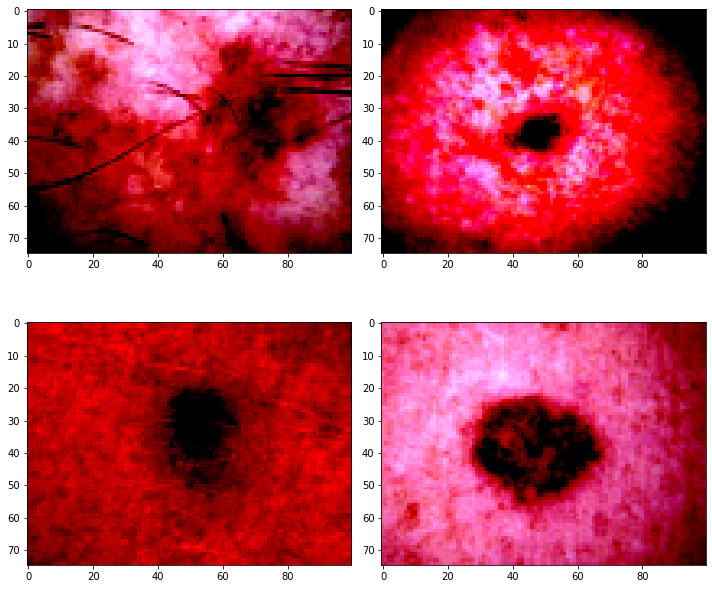

In [54]:
fig, (ax) = plt.subplots(2, 2, figsize = (10, 10))
k = 0 
for i in range(2):
    for j in range(2):
        ax[i,j].imshow(x_train_1[k])
        ax[i,j].axis('on')
        k = k + 1  
    plt.tight_layout()

# Step 11: Label Encoding

In [55]:
y_train_1 = to_categorical(y_train, num_classes = 7)
y_test_1 = to_categorical(y_test, num_classes = 7)

In [56]:
print(y_train_1)

[[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]]


In [57]:
print(y_test_1)

[[0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 1. 0. ... 0. 0. 0.]]


# Step 19: Xception v4

In [58]:
datagen = ImageDataGenerator(featurewise_center = False,
                            samplewise_center = False,
                            featurewise_std_normalization = False,
                            samplewise_std_normalization = False,
                            zca_whitening = False,
                            rotation_range = 10,
                            zoom_range = 0.1,
                            width_shift_range = 0.1,
                            height_shift_range = 0.1,
                            horizontal_flip = False,
                            vertical_flip = False)

datagen.fit(x_train_1)

In [59]:
from tensorflow.keras.applications.xception import Xception
from tensorflow.keras import regularizers
input_shape = (75, 100, 3)

num_labels = 7

base_model = Xception(include_top = False, input_shape = input_shape,pooling = 'avg', 
                         weights = 'imagenet')
model = Sequential()
model.add(base_model)
model.add(Dropout(0.5))
model.add(Dense(128, activation="relu",kernel_regularizer=regularizers.l2(0.02)))
model.add(Dropout(0.5))
model.add(Dense(num_labels, activation = 'softmax',kernel_regularizer=regularizers.l2(0.02)))

for layer in base_model.layers:
    layer.trainable = True

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 xception (Functional)       (None, 2048)              20861480  
                                                                 
 dropout (Dropout)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 128)               262272    
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 7)                 903       
                                                                 
Total params: 21,124,655
Trainable params: 21,070,127
Non-trainable params: 54,528
_________________________________________________________________


In [60]:
optimizer = Adam(lr=0.0001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
model.compile(loss='categorical_crossentropy',
              optimizer=optimizer,
              metrics=['acc'])

C:\Users\abhis\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning:

The `lr` argument is deprecated, use `learning_rate` instead.



In [61]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)
model.compile(loss='categorical_crossentropy',
              optimizer=optimizer,
              metrics=['acc'])

In [63]:
epochs =  75
batch_size = 64
history = model.fit(datagen.flow(x_train_1, y_train_1, batch_size = batch_size),
                              epochs = epochs,
                              verbose = 1, steps_per_epoch=x_train.shape[0] // batch_size,
                              callbacks=[learning_rate_reduction])

Epoch 1/75
513/513 [==============================] - 1942s 4s/step - loss: 3.8363 - acc: 0.6791 - lr: 1.0000e-04
Epoch 2/75
513/513 [==============================] - 1937s 4s/step - loss: 1.1918 - acc: 0.9172 - lr: 1.0000e-04
Epoch 3/75
513/513 [==============================] - 1932s 4s/step - loss: 0.4980 - acc: 0.9573 - lr: 1.0000e-04
Epoch 4/75
513/513 [==============================] - 1928s 4s/step - loss: 0.2992 - acc: 0.9703 - lr: 1.0000e-04
Epoch 5/75
513/513 [==============================] - 1927s 4s/step - loss: 0.2244 - acc: 0.9802 - lr: 1.0000e-04
Epoch 6/75
513/513 [==============================] - 1926s 4s/step - loss: 0.1907 - acc: 0.9833 - lr: 1.0000e-04
Epoch 7/75
513/513 [==============================] - 1925s 4s/step - loss: 0.1686 - acc: 0.9869 - lr: 1.0000e-04
Epoch 8/75
513/513 [==============================] - 1923s 4s/step - loss: 0.1537 - acc: 0.9890 - lr: 1.0000e-04
Epoch 9/75
513/513 [==============================] - 1930s 4s/step - loss: 0.1470 - acc

Epoch 26/75
513/513 [==============================] - 1868s 4s/step - loss: 0.0848 - acc: 0.9960 - lr: 1.0000e-04
Epoch 27/75
513/513 [==============================] - 1873s 4s/step - loss: 0.0855 - acc: 0.9958 - lr: 1.0000e-04
Epoch 28/75
513/513 [==============================] - 1873s 4s/step - loss: 0.0848 - acc: 0.9958 - lr: 1.0000e-04
Epoch 29/75
513/513 [==============================] - 1879s 4s/step - loss: 0.0805 - acc: 0.9966 - lr: 1.0000e-04
Epoch 30/75
513/513 [==============================] - 1885s 4s/step - loss: 0.0787 - acc: 0.9966 - lr: 1.0000e-04
Epoch 31/75
513/513 [==============================] - 1890s 4s/step - loss: 0.0765 - acc: 0.9970 - lr: 1.0000e-04
Epoch 32/75
513/513 [==============================] - 1893s 4s/step - loss: 0.0774 - acc: 0.9968 - lr: 1.0000e-04
Epoch 33/75
513/513 [==============================] - 1881s 4s/step - loss: 0.0744 - acc: 0.9970 - lr: 1.0000e-04
Epoch 34/75
513/513 [==============================] - 1885s 4s/step - loss: 0.0

Epoch 51/75
513/513 [==============================] - 1888s 4s/step - loss: 0.0562 - acc: 0.9984 - lr: 1.0000e-04
Epoch 52/75
513/513 [==============================] - 1901s 4s/step - loss: 0.0589 - acc: 0.9980 - lr: 1.0000e-04
Epoch 53/75
513/513 [==============================] - 1901s 4s/step - loss: 0.0611 - acc: 0.9973 - lr: 1.0000e-04
Epoch 54/75
513/513 [==============================] - 2206s 4s/step - loss: 0.0575 - acc: 0.9979 - lr: 1.0000e-04
Epoch 55/75
513/513 [==============================] - 2260s 4s/step - loss: 0.0566 - acc: 0.9980 - lr: 1.0000e-04
Epoch 56/75
513/513 [==============================] - 2035s 4s/step - loss: 0.0572 - acc: 0.9978 - lr: 1.0000e-04
Epoch 57/75
513/513 [==============================] - 1957s 4s/step - loss: 0.0572 - acc: 0.9976 - lr: 1.0000e-04
Epoch 58/75
513/513 [==============================] - 1917s 4s/step - loss: 0.0569 - acc: 0.9978 - lr: 1.0000e-04
Epoch 59/75
513/513 [==============================] - 1914s 4s/step - loss: 0.0

In [65]:
x_test_1 = x_test['image'].tolist()

x_test_mean = np.mean(x_test_1)
x_test_std = np.std(x_test_1)

x_test_1 = (x_test_1 - x_test_mean)/x_test_std

In [81]:
loss, accuracy = model.evaluate(x_test_1, y_test_1, verbose = 1)
print("Test: Accuracy = %f ; loss_v = %f" %(accuracy, loss))

441/441 [==============================] - 185s 417ms/step - loss: 0.0784 - acc: 0.9906
Test: Accuracy = 0.990626 ; loss_v = 0.078430


In [82]:
model.save("Xception_Model_75_64.h5")

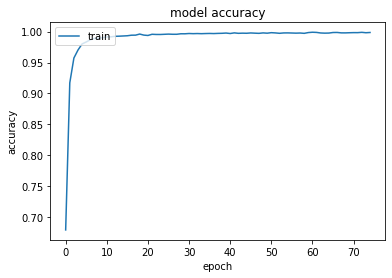

In [88]:
plt.plot(history.history['acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train'], loc = 'upper left')
plt.show()

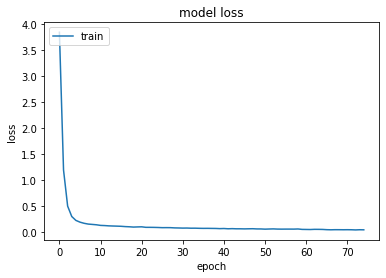

In [80]:
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc = 'upper left')
plt.show()

In [89]:
def plot_confusion_matrix(cm,classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
#The number of correct and incorrect predictions are summarized with count values and broken down by each class in a confusion matrix
    plt.imshow(cm, interpolation='nearest', cmap=cmap) 
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes)) 
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] 
        
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
        
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Classification report for classifier <keras.engine.sequential.Sequential object at 0x000001D3CCE33730>:
                                precision    recall  f1-score   support

              Melanocytic nevi       1.00      1.00      1.00      2012
                      Melanoma       1.00      1.00      1.00      2011
Benign keratosis-like lesions        0.97      1.00      0.98      2012
          Basal cell carcinoma       1.00      1.00      1.00      2012
             Actinic keratoses       1.00      0.94      0.97      2012
              Vascular lesions       0.97      1.00      0.99      2011
                Dermatofibroma       1.00      1.00      1.00      2011

                      accuracy                           0.99     14081
                     macro avg       0.99      0.99      0.99     14081
                  weighted avg       0.99      0.99      0.99     14081




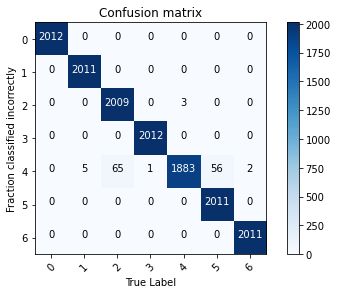

In [91]:
from sklearn import metrics
# Predict the values from the validation dataset
Y_pred = model.predict(x_test_1)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(y_test_1,axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes)

# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(7)) 
plt.xlabel('True Label')
plt.ylabel('Fraction classified incorrectly')

#Show Classification report
target_names = [
    'Melanocytic nevi',
    'Melanoma',
    'Benign keratosis-like lesions ',
    'Basal cell carcinoma',
    'Actinic keratoses',
    'Vascular lesions',
    'Dermatofibroma'
]
print("Classification report for classifier %s:\n%s\n"
      % (model, metrics.classification_report(Y_true, Y_pred_classes, target_names = target_names)))

In [101]:
pred = model.predict(x_test_1)

In [98]:
lesion_type_dict = {
    4: 'Melanocytic nevi',
    5: 'Melanoma',
    2: 'Benign keratosis-like lesions ',
    1: 'Basal cell carcinoma',
    0: 'Actinic keratoses',
    6: 'Vascular lesions',
    3: 'Dermatofibroma'
}

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


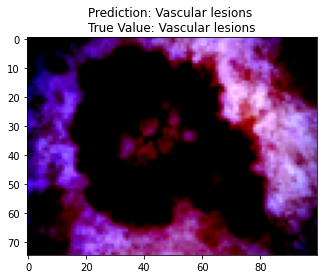

In [105]:
import matplotlib.pyplot as plt
plt.imshow(x_test_1[111].reshape(75,100,3), cmap='viridis')
plt.title('Prediction: {} \nTrue Value: {}'.format(lesion_type_dict[np.argmax(pred[111])], lesion_type_dict[np.argmax(y_test_1[111])]))
plt.show()

# Inception V4

In [ ]:
from tensorflow.compat.v1.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras import regularizers

input_shape = (75, 100, 3)

num_labels = 7

base_model = InceptionV3(include_top = False, input_shape = input_shape,pooling = 'avg', 
                         weights = 'imagenet')
model = Sequential()
model.add(base_model)
model.add(Dropout(0.5))
model.add(Dense(128, activation="relu",kernel_regularizer=regularizers.l2(0.02)))
model.add(Dropout(0.5))
model.add(Dense(num_labels, activation = 'softmax',kernel_regularizer=regularizers.l2(0.02)))

for layer in base_model.layers:
    layer.trainable = True

model.summary()

In [ ]:
optimizer = Adam (learning_rate=0.0005, beta_1=0.9, beta_2=0.999, epsilon=None, decay=5e-7, amsgrad=False)
model.compile(optimizer = optimizer , loss = "sparse_categorical_crossentropy", metrics=["accuracy"])

In [ ]:
y_train_1 = np.argmax(y_train_1, axis = 1)

In [ ]:
datagen = ImageDataGenerator(featurewise_center = False,
                            samplewise_center = False,
                            featurewise_std_normalization = False,
                            samplewise_std_normalization = False,
                            zca_whitening = False,
                            rotation_range = 10,
                            zoom_range = 0.1,
                            width_shift_range = 0.1,
                            height_shift_range = 0.1,
                            horizontal_flip = False,
                            vertical_flip = False)

datagen.fit(x_train_1)

In [ ]:
epochs = 75
batch_size = 64
history = model.fit(datagen.flow(x_train_1, y_train_1, batch_size = batch_size),
                              epochs = epochs,
                              verbose = 1, steps_per_epoch=x_train.shape[0] // batch_size)

In [ ]:
y_test_1 = np.argmax(y_test_1, axis =1)

In [ ]:
loss, Inception_accuracy = model.evaluate(x_test_1, y_test_1, verbose = 0)
print("Test: accuracy = %f;  loss = %f" % ( Inception_accuracy, loss))
model.save("Inception_Model_75_64.h5")

In [ ]:
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train'], loc = 'upper left')
plt.show()

In [ ]:
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc = 'upper left')
plt.show()

In [ ]:
def plot_confusion_matrix(cm,classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
#The number of correct and incorrect predictions are summarized with count values and broken down by each class in a confusion matrix
    plt.imshow(cm, interpolation='nearest', cmap=cmap) 
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes)) 
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] 
        
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
        
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [ ]:
from sklearn import metrics
# Predict the values from the validation dataset
Y_pred = model.predict(x_test_1)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
# Convert validation observations to one hot vectors
Y_true = y_test_1
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes)

# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(7)) 
plt.xlabel('True Label')
plt.ylabel('Fraction classified incorrectly')

#Show Classification report
target_names = [
    'Melanocytic nevi',
    'Melanoma',
    'Benign keratosis-like lesions ',
    'Basal cell carcinoma',
    'Actinic keratoses',
    'Vascular lesions',
    'Dermatofibroma'
]
print("Classification report for classifier %s:\n%s\n"
      % (model, metrics.classification_report(Y_true, Y_pred_classes, target_names = target_names)))